## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [338]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [339]:
df = pd.read_csv('ab_data.csv') # To Read CSV file
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [340]:
df.shape # output is in format of rows, columns

(294478, 5)

c. The number of unique users in the dataset.

In [341]:
df.user_id.nunique() # to get the unique user id counts

290584

d. The proportion of users converted.

In [342]:
# Propotion of user can be computed through true converted counts and total unique user counts. 
conv_prop = df.query('converted == "1"').user_id.nunique() / df.user_id.nunique() * 100

print("The proportion of users converted is", round(conv_prop, 4))



The proportion of users converted is 12.1042


e. The number of times the `new_page` and `treatment` don't line up.

In [343]:
df.query('(group == "treatment" and landing_page != "new_page") or (group == "control" and landing_page == "new_page")').user_id.count()

3893

f. Do any of the rows have missing values?

In [344]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [345]:
df1 = df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index
df2 = df.drop(df1)

In [346]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [347]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [348]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [349]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [350]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [351]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)

In [352]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [353]:
sum(df2.duplicated())

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [354]:
#probability of an individual converting regardless of the page 
conv_users = df2.query('converted == 1').shape[0]
p1 = float(conv_users/df2.shape[0])
print("The probability of an individual converting regardless of the page is {:.4f}".format(p1))


The probability of an individual converting regardless of the page is 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [355]:
#Probability of individual converting in control group.
conv_control_users = df2.query('converted == 1 and group == "control"').shape[0]
users_Control_group= df2.query('group == "control"').shape[0]
p2 = float(conv_control_users / users_Control_group)
print("Given that an individual was in the control group, the probability they converted is {:.4f}".format(p2))

Given that an individual was in the control group, the probability they converted is 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [356]:
#Probability of individual converting in treatment group.
conv_treat_users = df2.query('converted == 1 and group == "treatment"').shape[0]
treatment_users = df2.query('group == "treatment"').shape[0]
p3 = conv_treat_users /treatment_users
print(" Given that an individual was in the treatment group, the probability they converted is {:.4f}".format(p3))

 Given that an individual was in the treatment group, the probability they converted is 0.1188


d. What is the probability that an individual received the new page?

In [357]:
new_page = df2.query('landing_page == "new_page"').shape[0]
p4 = float(new_page / df2.shape[0])
print("The probability that an individual received the new page is {:.4f}".format(p4))

The probability that an individual received the new page is 0.5001


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Response:**
1. The probability of an individual converting regardless of the page is 0.1196
2. Given that an individual was in the control group, the probability they converted is 0.1204
3. Given that an individual was in the treatment group, the probability for user who converted is 0.1188
4. The probability that an individual received the new page 0.5001
There are no proper evidences that are suggesting to use new page as probability is about 50%.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



$H_{0}$ : $p_{new}$  -$p_{old}$ <= 0

$H_{1}$ : $p_{new}$ - $p_{old}$ > 0



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [358]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. What is the **convert rate** for $p_{new}$ under the null? 

In [359]:
#Convert rate irrespective of the landing page
p_new = round(df2['converted'].mean(),4)
print(p_new)

0.1196


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [360]:
##Convert rate irrespective of the landing page
p_old = round(df2['converted'].mean(),4)
print(p_old)

0.1196


In [361]:
## Coverted Rate with respect to control group 
df2_control = df2.query("group == 'control'")
convereted_rate_old = round(df2_control.converted.mean(),4)
print(convereted_rate_old)

0.1204


In [362]:
## Covert Rate with respect  to experiment group 
df2_treatment = df2.query("group == 'treatment'")
convereted_rate_new = round(df2_treatment.converted.mean(),4)
print(convereted_rate_new)

0.1188


In [363]:
# Observed Difference
obs_diff = convereted_rate_new - convereted_rate_old
print(obs_diff)

-0.0016


c. What is $n_{new}$?

In [364]:
#n_new would be where group is equal to  'treatment'
n_new = df2.query('group == "treatment"').shape[0]
print(n_new) 

145310


d. What is $n_{old}$?

In [365]:
#n_new would be where group is equal to  'control'
n_old = df2.query('group == "control"').shape[0]
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [366]:
#Simulation of n_new  transactions with a convert rate of  p_new  under the null
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
print(new_page_converted)

[0 0 0 ..., 0 0 0]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [367]:
#Simulation of n_old transactions with a convert rate of  p_old  under the null
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
print(old_page_converted)

[0 0 0 ..., 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [368]:
diff = new_page_converted.mean() - old_page_converted.mean() 
print(diff)

0.000121815662434


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [369]:
#bootstraping simulation with the covnversion rate between new page and old page
p_diffs = []
for _ in range(10000):
        new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
        old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
        diff = new_page_converted.mean() - old_page_converted.mean() 
        p_diffs.append(diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

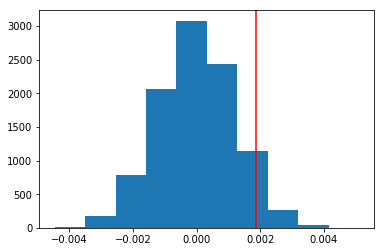

In [370]:
plt.hist(p_diffs);
plt.axvline(diff, c='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [371]:
p_diffs = np.array(p_diffs)

In [372]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

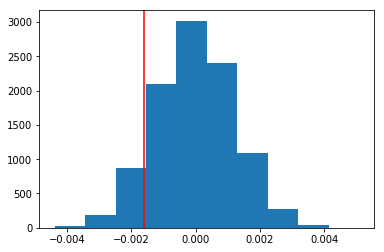

In [373]:
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [379]:
(null_vals > obs_diff).mean()

0.9022

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The Value is p-value in scientific studies. As per rule of thumb, A large p-value (> 0.05) indicates weak evidence against the null hypothesis, that indicates for fail to reject the null hypothesis. 
With this data set as p-value is greater than 0.05 so we can conclude that no significant use of new_page as old_page. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [375]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and group == "control"').shape[0]
convert_new = df2.query('converted == 1 and group == "treatment"').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [376]:
#Rejection Region for Upper-Tailed Z Test (H1: μ > μ0 ) with α=0.05
#The decision rule is: Reject H0 if Z > 1.645.

z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value


(-1.3109241984234394, 0.90505831275902449)

In [377]:
from scipy.stats import norm

norm.cdf(z_score)
# 0.9999999383005862 # Tells us how significant our z-score is

0.094941687240975514

In [378]:
print(norm.ppf(1-(0.05)))
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

1.64485362695


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Response:**
1. As z-score -1.3109241984234394  is not more  than critical value 1.64485362695, so we  will fail to reject the null hypothesis. 
2. Findings here are inline with parts j. & k. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should opt Logistic Regression as we are building a model to predict conversion of page from the ab_data, our target is going to be "converted" variable from the dataframe.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [380]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

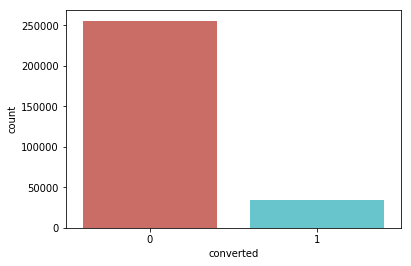

In [381]:
import seaborn as sns
df['converted'].value_counts()
sns.countplot(x='converted',data=df2, palette='hls');

In [382]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [383]:
df2['intercept'] = 1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 May 2018   Pseudo R-squ.:               8.077e-06
Time:                        08:13:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [384]:
np.exp(	-0.0140), 1/np.exp(	-0.0140)

(0.98609754426286189, 1.0140984589384923)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

p-value is 0.190 and again more than alpha value 0.05 so we will fail to reject Null  Hypothesis.   

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0

$H_{1}$ : $p_{new}$ - $p_{old}$ != 0




f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Response:**
1. Other Variables will definitely influence the individual converts. As in Linear and Multilinear Regression, we do modelling the response (or dependent) variable analysis based on interrelationship between the one or more explanatory variables (or independent variables).  
2. It is always good idea to consider other meaningful variables in to the model. It will help to narrow down the analysis on the basis of the other factors as well. In this dataset we can add other factors like duration, country, education rate in country, weekends vs weekdays.
3. There would be always disadvantage to consider the additional variables in model as it might take more time to calibrate. Further model should have only meaningful variables as model should have little or no multicollinearity.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [385]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [386]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [387]:
df_new = df2.set_index('user_id').join(df_countries.set_index('user_id'),how='inner')
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [388]:
df_new['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [389]:
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [390]:
df_new['intercept'] = 1
log_mod_con = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'UK']])
results = log_mod_con.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 11 May 2018   Pseudo R-squ.:               1.521e-05
Time:                        08:13:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [391]:
# The logistic regression with the addition of ab_page.

df_new['intercept'] = 1
log_mod_con = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK']])
results = log_mod_con.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 11 May 2018   Pseudo R-squ.:               2.323e-05
Time:                        08:13:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [392]:
np.exp(results.params)

intercept    0.131332
ab_page      0.985168
US           1.041599
UK           1.051944
dtype: float64

In [393]:
#Reciprocal value for ab_page.
1/np.exp(-0.0149)

1.0150115583846535

**Interpretation** : 
1. p-values are changing across the countries but for both countries the value is more than 0.05
2. Conversion is 0.98 times for treatment group than control group as in ab_page we have 1 for treatment group.
3. For 1 unit increase in US, conversion is 1.041 likely holding all else constant.
4. For 1 unit increase in UK, conversion is 1.051 likely holding all else constant. 
5. For one unit decrease in ab_page, conversion is 1.015 times likely holding all else constant.  
 

As of now we have  looked only on the individual factors of country and page  on conversion, Further we would like to look interaction between page and country. 

In [394]:
# Interaction of variable for page & country
df_new['US_ab_page'] = df_new['ab_page']*df_new['US']
df_new['UK_ab_page'] = df_new['ab_page']*df_new['UK']
log_mod_con = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','US_ab_page', 'UK_ab_page', 'US', 'UK']])
results = log_mod_con.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 11 May 2018   Pseudo R-squ.:               3.482e-05
Time:                        08:13:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
==============================================================================
"""

In [395]:
np.exp(results.params)

intercept     0.134794
ab_page       0.934776
US_ab_page    1.048001
UK_ab_page    1.081428
US            1.017682
UK            1.011854
dtype: float64

**Interpretation :**

1.	Coefficient of interaction variable "UK_ab_page" and "US_ab_page" are different from the coefficient of ab_page & respective country itself.
2.	The minor interaction is present between country and new page in the way they related to the conversion.
3.	For US and new page users, conversion is 1.048 likely holding all else constant.
4.	For UK and new page users, conversion is 1.081 likely holding all else constant.
5.	For 1 unit increase in US, conversion is 1.017 likely holding all else constant.
6.	For 1 unit increase in UK, conversion is 1.011 likely holding all else constant.

**Conclusion**
With alpha value 0.05, with  I would say none of these factors in Logistic Regression are good predictors of conversion. 
With Simulation , Z-test , Logistic regression, we will fail to reject null hypothesis.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [396]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0